Для практики решения подобных задач можно пройти [практикум на степике](https://stepik.org/lesson/%D0%A0%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5-%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC-%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D1%85-%D1%83%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9-%D0%B2-Python-%D0%9F%D0%A0%D0%90%D0%9A%D0%A2%D0%98%D0%9A%D0%A3%D0%9C-31653/step/1)

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

<img src="image01.png">

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:
<img src="lineqn.png">
где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

**1.Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?**

In [1]:
%matplotlib inline
import numpy as np
import math
from scipy import linalg
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
def f(x):
    return np.sin(x / 5.) * np.exp(x / 10.) + 5 * np.exp(-x / 2.0)

In [5]:
print f(1.)
print f(15.)

3.25221686527
0.635221419579


In [6]:
b1 = np.array([f(1.), f(15.)], dtype="float")
print b1

[ 3.25221687  0.63522142]


In [7]:
A1 = np.array([[1, 1], [1, 15]], dtype="float")
print A1

[[  1.   1.]
 [  1.  15.]]


In [8]:
w1 = np.linalg.solve(A1, b1)
print w1

[ 3.43914511 -0.18692825]


In [16]:
def f1(x):
    return w1[0] + w1[1]*x

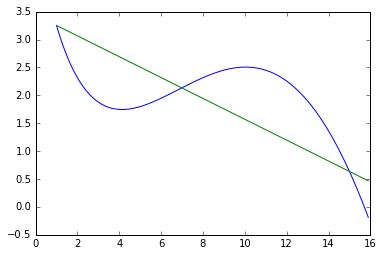

In [15]:
x = np.arange(1., 16., 0.1)
plt.plot(x, f(x), x, f1(x))
plt.show()

#### 2.Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

In [17]:
b2 = np.array([f(1.), f(8.), f(15.)], dtype="float")
print b2

[ 3.25221687  2.31617016  0.63522142]


In [19]:
A2 = np.array([[1, 1, 1], [1, 8, 64], [1, 15, 225]], dtype="float")
print A2

[[   1.    1.    1.]
 [   1.    8.   64.]
 [   1.   15.  225.]]


In [20]:
w2 = np.linalg.solve(A2, b2)
print w2

[ 3.32512949 -0.06531159 -0.00760104]


In [23]:
def f2(x):
    return w2[0] + w2[1]*x + w2[2]*x**2

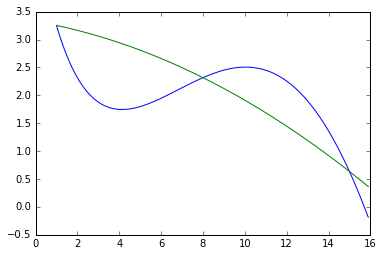

In [24]:
x = np.arange(1., 16., 0.1)
plt.plot(x, f(x), x, f2(x))
plt.show()

#### 3.Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

In [26]:
b3 = np.array([f(1), f(4), f(10), f(15)])
print b3

[ 3.25221687  1.74684595  2.50541641  0.63522142]


In [27]:
A3 = np.array([[1, 1, 1, 1], [1, 4, 16, 64], 
               [1, 10, 100, 1000], [1, 15, 225, 3375]], dtype = "float")
print A3

[[  1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   4.00000000e+00   1.60000000e+01   6.40000000e+01]
 [  1.00000000e+00   1.00000000e+01   1.00000000e+02   1.00000000e+03]
 [  1.00000000e+00   1.50000000e+01   2.25000000e+02   3.37500000e+03]]


In [28]:
w3 = linalg.solve(A3, b3)
print w3 # ответ на задание

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


In [25]:
def f3(x):
    return w3[0] + w3[1]*x + w3[2]*x**2 + w3[3]*x**3

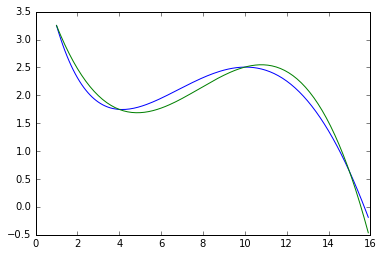

In [29]:
x = np.arange(1., 16., 0.1)
plt.plot(x, f(x), x, f3(x))
plt.show()

#### 4.Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [22]:
w3_string = w3.astype('string')
s = " ".join(w3_string)
print s

4.36264153512 -1.29552586569 0.193336847022 -0.00823565117332


In [24]:
file_obj = open('submission-2.txt', 'w')
file_obj.write(s) # something wrong, wrong encoding?
file_obj.close()